In [86]:
import numpy as np #for linear algebra
import pandas as pd #for working with dataframe

In [87]:
import matplotlib.pyplot as plt #all for visualization
%matplotlib inline
import seaborn as sns

In [88]:
df_train = pd.read_csv('datasets_9961_14084_Train_bigmart_sales.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [90]:
df_test = pd.read_csv('datasets_9961_14084_Test_bigmart_sales.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [92]:
df_train['source'] = 'train' #we are putting extra columns to train and test data, we are going to use them in the end
df_test['source'] = 'test'

In [93]:
df_new = pd.concat([df_train, df_test])
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [94]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

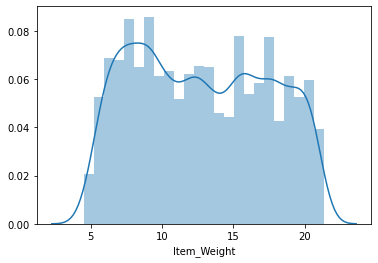

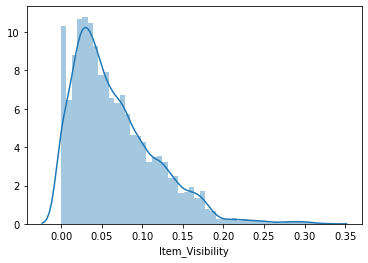

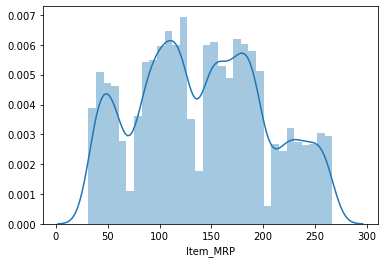

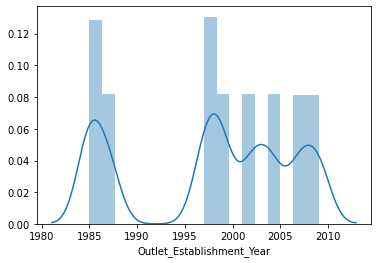

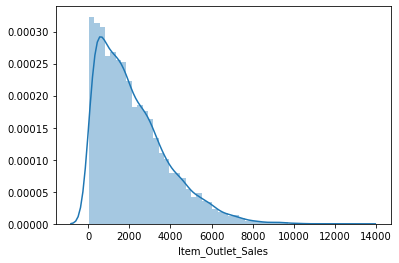

In [95]:
for i in df_new.describe().columns: #checking the distribution of numerical variables
    sns.distplot(df_new[i].dropna())
    plt.show()

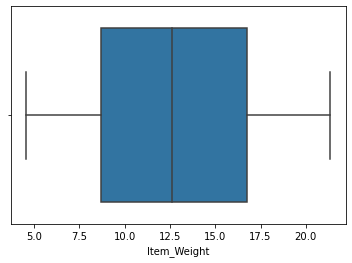

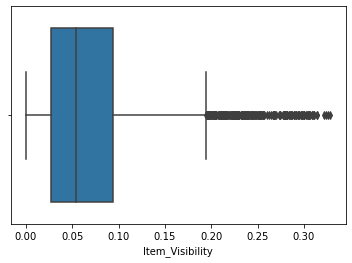

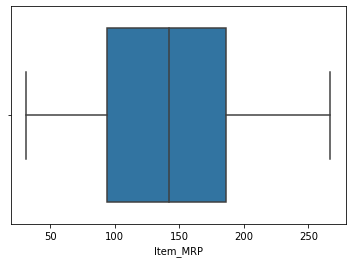

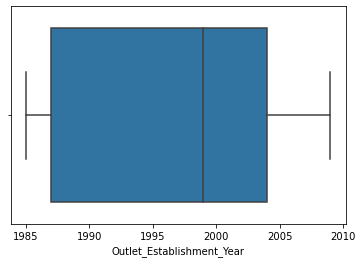

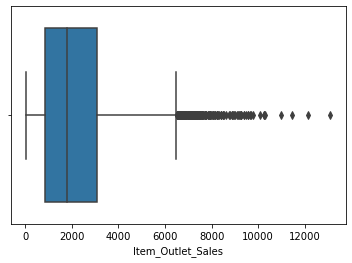

In [96]:
for i in df_new.describe().columns:
    sns.boxplot(df_new[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

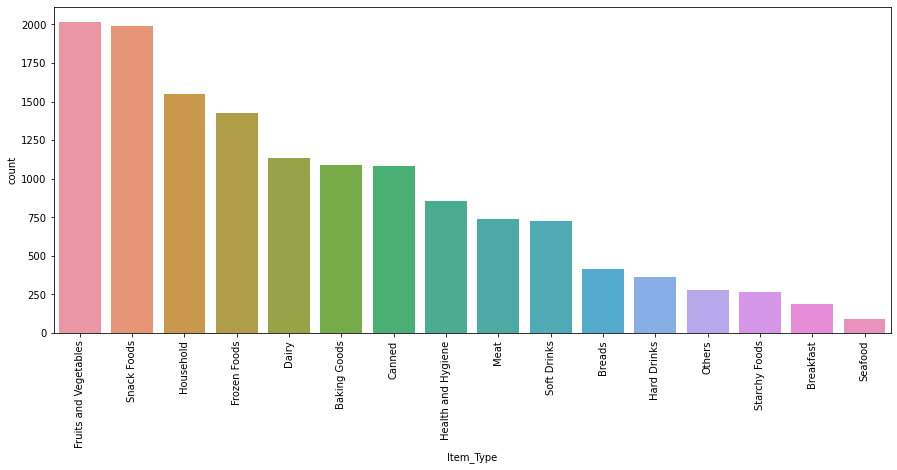

In [97]:
plt.figure(figsize=(15,6))
sns.countplot(df_new['Item_Type'], order=df_new['Item_Type'].value_counts().index)
plt.xticks(rotation=90)

In [98]:
print('Skewness: %f' %df_new['Item_Outlet_Sales'].skew())
print('Kurtosis: %f' %df_new['Item_Outlet_Sales'].kurt())
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, 
# is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether 
# the data are heavy-tailed or light-tailed relative to a normal distribution.
# For a symmetric normal distribution; skewness=0.3 and kurtosis=2.96

Skewness: 1.177531
Kurtosis: 1.615877


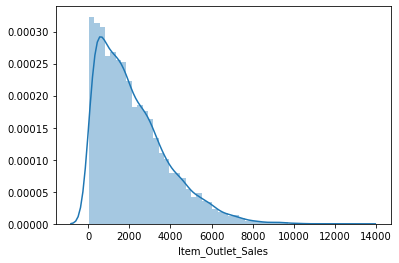

In [99]:
sns.distplot(df_new['Item_Outlet_Sales'])

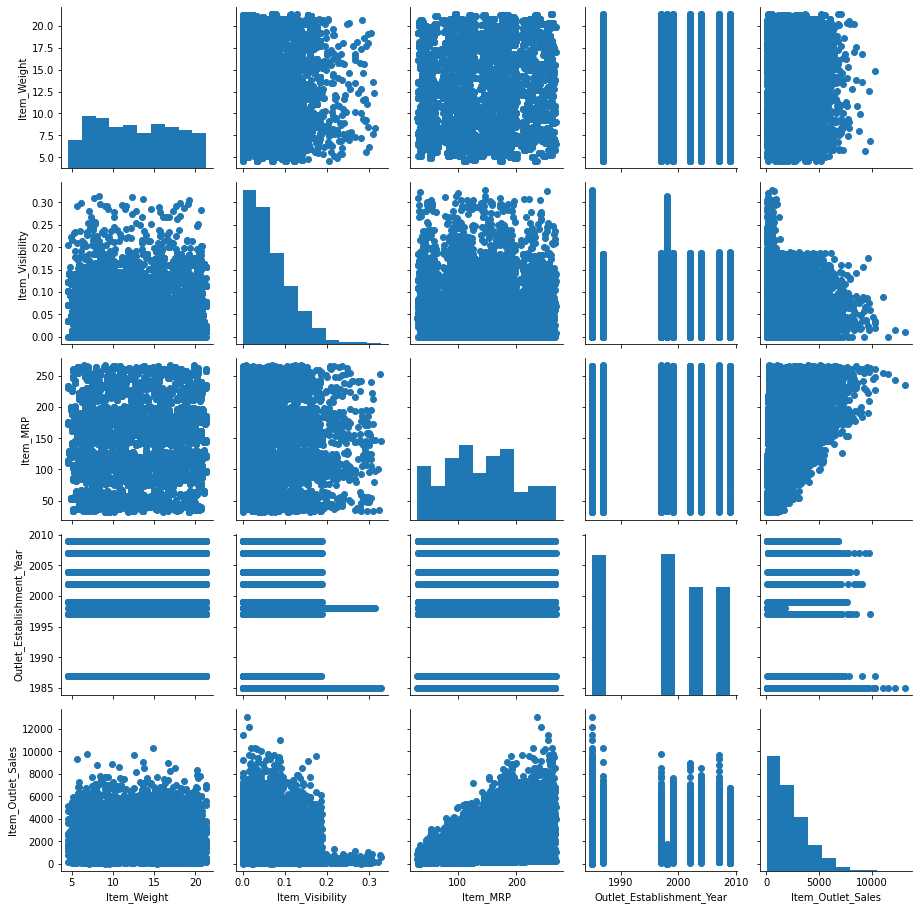

In [100]:
g = sns.PairGrid(df_new)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)

In [101]:
df_new.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [102]:
df_new['Item_Fat_Content'].value_counts() #some of the variables are actually the same

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [103]:
df_new['Item_Fat_Content'].replace(to_replace = 'LF', value = 'Low Fat', inplace = True)
df_new['Item_Fat_Content'].replace(to_replace = 'low fat', value = 'Low Fat', inplace = True)
df_new['Item_Fat_Content'].replace(to_replace = 'reg', value = 'Regular', inplace = True)

In [104]:
df_new['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [105]:
df_new['Item_Fat_Content']  = df_new['Item_Fat_Content'].map({'Low Fat':1, 'Regular':2}) #encoding

In [106]:
df_new['Item_Fat_Content'].value_counts()

1    9185
2    5019
Name: Item_Fat_Content, dtype: int64

In [107]:
df_new['Item_Identifier'].nunique() #there are 1559 unique variables

1559

In [108]:
df_new['New_Item_Identifier'] = df_new['Item_Identifier'].apply(lambda x: x[0:2]) #we are trying to categorizing them

In [109]:
df_new['New_Item_Identifier'] = df_new['New_Item_Identifier'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

In [110]:
df_new['New_Item_Identifier'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Identifier, dtype: int64

In [111]:
df_new['New_Item_Identifier'] = df_new['New_Item_Identifier'].map({'Food':1, 'Non-Consumable':2, 'Drinks':3}) #encoding

In [112]:
df_new['Item_Weight'] = df_new['Item_Weight'].fillna(df_new['Item_Weight'].mean()) #handling the missing values by filling
                                                                                   #with mean

In [113]:
df_new['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [114]:
item_type_dummies = pd.get_dummies(data=df_new['Item_Type']) #making them dummy variables

In [115]:
df_new = pd.concat([df_new, item_type_dummies], axis=1)

In [116]:
outlet_identifier_dummies = pd.get_dummies(data=df_new['Outlet_Identifier']) #making them dummy variables

In [117]:
df_new = pd.concat([df_new, outlet_identifier_dummies], axis=1)

In [118]:
df_new['Outlet_Size'].isna().value_counts() #there are some missing values 

False    10188
True      4016
Name: Outlet_Size, dtype: int64

In [119]:
df_new['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

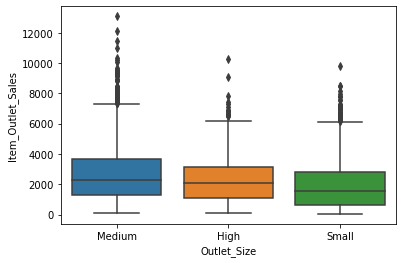

In [120]:
sns.boxplot(data=df_new, x='Outlet_Size', y='Item_Outlet_Sales')

In [121]:
df_new['Outlet_Size'] = df_new['Outlet_Size'].fillna(value='Other') #named 'other' the missing values

In [122]:
df_new['Outlet_Location_Type_2'] = df_new['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3}) #encoding

In [123]:
df_new['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [124]:
df_new['Outlet_Type_2'] = df_new['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3,
                                                        'Grocery Store': 4}) #encoding

In [125]:
df_new.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'New_Item_Identifier',
       'Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'OUT010', 'OUT013',
       'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046',
       'OUT049', 'Outlet_Location_Type_2', 'Outlet_Type_2'],
      dtype='object')>

In [126]:
df_new.select_dtypes(include=[np.object]) #checking the object type variables

,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Fruits and Vegetables,OUT010,Other,Tier 3,Grocery Store,train
4,NCD19,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...
5676,FDB58,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
5677,FDD47,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,Health and Hygiene,OUT045,Other,Tier 2,Supermarket Type1,test
5679,FDJ26,Canned,OUT017,Other,Tier 2,Supermarket Type1,test


In [127]:
df_new = df_new.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], 
                         axis=1) #dropping the object type variables

In [128]:
df_new['Outlet_Size'].value_counts()

Medium    4655
Other     4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [129]:
df_new['Outlet_Size_2'] = df_new['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3, 'Other':4}) #encoding

In [130]:
df_new = df_new.drop(['Outlet_Size'], axis=1) #dropping the object type variables after encoding

In [131]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,New_Item_Identifier,Baking Goods,Breads,...,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Outlet_Location_Type_2,Outlet_Type_2,Outlet_Size_2
0,9.30,1,0.016047,249.8092,1999,3735.1380,train,1,0,0,...,0,0,0,0,0,0,1,1,1,2
1,5.92,2,0.019278,48.2692,2009,443.4228,train,3,0,0,...,1,0,0,0,0,0,0,3,2,2
2,17.50,1,0.016760,141.6180,1999,2097.2700,train,1,0,0,...,0,0,0,0,0,0,1,1,1,2
3,19.20,2,0.000000,182.0950,1998,732.3800,train,1,0,0,...,0,0,0,0,0,0,0,3,4,4
4,8.93,1,0.000000,53.8614,1987,994.7052,train,2,0,0,...,0,0,0,0,0,0,0,3,1,3


In [132]:
df_new['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [133]:
establishment_year = pd.get_dummies(data=df_new['Outlet_Establishment_Year']) #making dummy variables
establishment_year

,1985,1987,1997,1998,1999,2002,2004,2007,2009
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5676,0,0,1,0,0,0,0,0,0
5677,0,0,0,0,0,0,0,0,1
5678,0,0,0,0,0,1,0,0,0
5679,0,0,0,0,0,0,0,1,0


In [134]:
df_new = pd.concat([df_new,establishment_year], axis=1)

In [135]:
df_new = df_new.drop('Outlet_Establishment_Year', axis=1)

In [136]:
df_new.columns

Index([           'Item_Weight',       'Item_Fat_Content',
              'Item_Visibility',               'Item_MRP',
            'Item_Outlet_Sales',                 'source',
          'New_Item_Identifier',           'Baking Goods',
                       'Breads',              'Breakfast',
                       'Canned',                  'Dairy',
                 'Frozen Foods',  'Fruits and Vegetables',
                  'Hard Drinks',     'Health and Hygiene',
                    'Household',                   'Meat',
                       'Others',                'Seafood',
                  'Snack Foods',            'Soft Drinks',
                'Starchy Foods',                 'OUT010',
                       'OUT013',                 'OUT017',
                       'OUT018',                 'OUT019',
                       'OUT027',                 'OUT035',
                       'OUT045',                 'OUT046',
                       'OUT049', 'Outlet_Location_Type_2

In [137]:
df_new.isna().any() #last check before modelling

Item_Weight               False
Item_Fat_Content          False
Item_Visibility           False
Item_MRP                  False
Item_Outlet_Sales          True
source                    False
New_Item_Identifier       False
Baking Goods              False
Breads                    False
Breakfast                 False
Canned                    False
Dairy                     False
Frozen Foods              False
Fruits and Vegetables     False
Hard Drinks               False
Health and Hygiene        False
Household                 False
Meat                      False
Others                    False
Seafood                   False
Snack Foods               False
Soft Drinks               False
Starchy Foods             False
OUT010                    False
OUT013                    False
OUT017                    False
OUT018                    False
OUT019                    False
OUT027                    False
OUT035                    False
OUT045                    False
OUT046  

In [141]:
train = df_new.loc[df_new['source'] == 'train'] #splitting train and test data using 'source' column we created in the
                                                #beginning
test = df_new.loc[df_new['source'] == 'test']

In [142]:
train = train.drop(['source'], axis=1)

In [143]:
test = test.drop(['Item_Outlet_Sales', 'source'], axis=1)

In [144]:
X_train = train.drop(['Item_Outlet_Sales'], axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.copy()

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler = MinMaxScaler()

In [147]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lm = LinearRegression()

In [150]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
pred = lm.predict(X_test)

In [159]:
pred

array([1835. , 1526.5, 1881. , ..., 1824.5, 3589.5, 1286.5])

In [164]:
pred.shape

(5681,)

In [165]:
y_train.shape

(8523,)

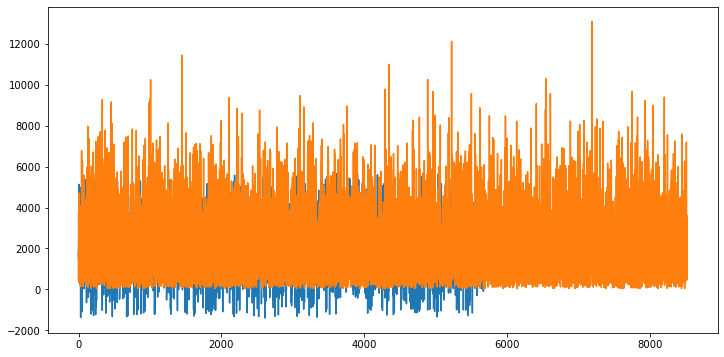

In [166]:
plt.figure(figsize=(12,6))
plt.plot(pred)
plt.plot(y_train)
plt.show()

In [169]:
accuracy = lm.score(X_train, y_train)
round(accuracy, ndigits=2)

0.56